#### Building a plot line based recommender

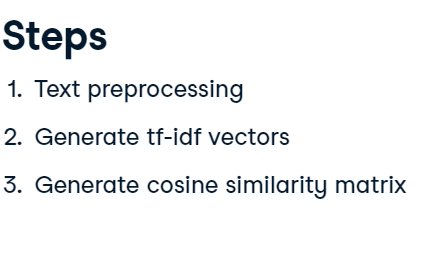

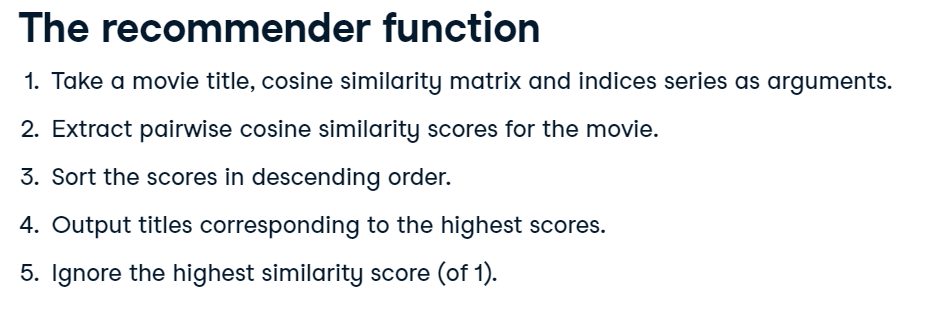

In [2]:
import pandas as pd
add="C:/Users/ANTHONY/Desktop/CSV&XLSX/movie_overviews.csv"
movie=pd.read_csv(add)
# Print the head of df
movie.head()


,id,title,overview,tagline
0,862,Toy Story,"Led by Woody, Andy's toys live happily in his ...",NaN
1,8844,Jumanji,When siblings Judy and Peter discover an encha...,Roll the dice and unleash the excitement!
2,15602,Grumpier Old Men,A family wedding reignites the ancient feud be...,Still Yelling. Still Fighting. Still Ready for...
3,31357,Waiting to Exhale,"Cheated on, mistreated and stepped on, the wom...",Friends are the people who let you be yourself...
4,11862,Father of the Bride Part II,Just when George Banks has recovered from his ...,Just When His World Is Back To Normal... He's ...


In [3]:
df=movie[['title','overview']]
df

,title,overview
0,Toy Story,"Led by Woody, Andy's toys live happily in his ..."
1,Jumanji,When siblings Judy and Peter discover an encha...
2,Grumpier Old Men,A family wedding reignites the ancient feud be...
3,Waiting to Exhale,"Cheated on, mistreated and stepped on, the wom..."
4,Father of the Bride Part II,Just when George Banks has recovered from his ...
...,...,...
9094,The Last Brickmaker in America,A man must cope with the loss of his wife and ...
9095,Rustom,"Rustom Pavri, an honourable officer of the Ind..."
9096,Mohenjo Daro,"Village lad Sarman is drawn to big, bad Mohenj..."
9097,Shin Godzilla,From the mind behind Evangelion comes a hit la...


In [5]:
# Import TfidfVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
import numpy as np

df['overview']=df['overview'].values.astype('str')

# Initialize a TfidfVectorizer object: tfidf_vectorizer
tfidf_vectorizer = TfidfVectorizer(stop_words='english')


# Transform the training data: tfidf_train .....this fitting to model is to convert it to numerical words vector
tfidf_ = tfidf_vectorizer.fit_transform(df['overview'])



# Print the first 10 features
print(tfidf_vectorizer.get_feature_names()[:10])

# Print the first 5 vectors of the tfidf training data
print(tfidf_.A[:5])


<ipython-input-5-70b919c8a083>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['overview']=df['overview'].values.astype('str')


['00', '000', '007', '01', '05pm', '10', '100', '1000', '100th', '101']
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [6]:
from sklearn.metrics.pairwise import linear_kernel

# Generate the cosine similarity matrix
cosine_sim = linear_kernel(tfidf_, tfidf_)

#output remains the same if we take take both cosine_similarity or linear_kernal,,,,,
#but it takes significantly lesser time to compute with linear_kernal.

cosine_sim          #shows similarity score of each movie overview with evry other movie overview



array([[1.        , 0.01801424, 0.        , ..., 0.        , 0.        ,
        0.01172966],
       [0.01801424, 1.        , 0.04893243, ..., 0.        , 0.00617224,
        0.01162237],
       [0.        , 0.04893243, 1.        , ..., 0.        , 0.00772206,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 1.        , 0.        ,
        0.        ],
       [0.        , 0.00617224, 0.00772206, ..., 0.        , 1.        ,
        0.00489843],
       [0.01172966, 0.01162237, 0.        , ..., 0.        , 0.00489843,
        1.        ]])

In this exercise, we will build a recommender function get_recommendations(), as discussed in the lesson and the previous exercise. As we know, it takes in a title, a cosine similarity matrix, and a movie title and index mapping as arguments and outputs a list of 10 titles most similar to the original title (excluding the title itself).

In [7]:
# Generate mapping between titles and index
#The indices series is a reverse mapping of movie titles with their indices in the original dataframe
indices = pd.Series(df.index, index=df['title']).drop_duplicates()

indices

#there is no necessity of inverse mapping... we can also do it like this...df[df[‘title’]==’rustom’].index.values)


title
Toy Story                                                0
Jumanji                                                  1
Grumpier Old Men                                         2
Waiting to Exhale                                        3
Father of the Bride Part II                              4
                                                      ... 
The Last Brickmaker in America                        9094
Rustom                                                9095
Mohenjo Daro                                          9096
Shin Godzilla                                         9097
The Beatles: Eight Days a Week - The Touring Years    9098
Length: 9099, dtype: int64

BELOW IS AN EXAMPLE TO SHOW HOW THE RECOMENDATION WORKS ...THEN WE WILL IMPLEMENT FUNCTION

In [8]:
idx = indices['Rustom']
# Sort the movies based on the similarity scores
sim_scores = list(enumerate(cosine_sim[idx]))
sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)

#print(df[df[‘Name’]==’BATMAN’].index.values)

sim_scores   #SHOWS A MOVIE WITH ALL ITS SIMILAIRTY SCORE SORTED FROM HIGH TO LOW

[(9095, 1.0),
 (4981, 0.12568502397998105),
 (2073, 0.10530254805817547),
 (7659, 0.10330160701250685),
 (5665, 0.09883612346410413),
 (5684, 0.0955375567785859),
 (8547, 0.08793793213213122),
 (411, 0.08614703629812073),
 (6922, 0.08557204060994392),
 (5062, 0.08307140016061795),
 (3752, 0.08265227411815766),
 (56, 0.08241131695884714),
 (2862, 0.08170735179705915),
 (918, 0.08131198004636149),
 (877, 0.08129843192317607),
 (1792, 0.07880181873322352),
 (3719, 0.07522124561916185),
 (6769, 0.07429790532703832),
 (5895, 0.07311221442942331),
 (3037, 0.0723630277043042),
 (8774, 0.06952097666703749),
 (852, 0.06934403721440176),
 (5815, 0.06918833149192605),
 (4927, 0.06731031406370588),
 (4751, 0.066747098955502),
 (4237, 0.06539195880848828),
 (4656, 0.06506257606670889),
 (2168, 0.0637789649384617),
 (6227, 0.06344877529208451),
 (4506, 0.063200758290497),
 (2463, 0.061982639264712855),
 (673, 0.06189141061862992),
 (2570, 0.06111102530233393),
 (5385, 0.06085521521820182),
 (6003, 0

In [9]:
def get_recommendations(title, cosine_sim, indices):
    # Get index of movie that matches title
    idx = indices[title]
    #there is no necessity of inverse mapping... we can also do it like this...df[df[‘title’]==’rustom’].index.values)
    # Sort the movies based on the similarity scores
    sim_scores = list(enumerate(cosine_sim[idx]))
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)
    # Get the scores for 10 most similar movies
    sim_scores = sim_scores[1:11]    #WE WILL SKIP THE INDEX 0 BECASUE ITS THE MOVIE ITSELF
    # Get the movie indices
    movie_indices = [i[0] for i in sim_scores]
    # Return the top 10 most similar movies
    return df['title'].iloc[movie_indices]

In [10]:
# Generate recommendations
print(get_recommendations('The Dark Knight Rises', cosine_sim, indices))

132                              Batman Forever
6907                            The Dark Knight
1116                             Batman Returns
7573                 Batman: Under the Red Hood
524                                      Batman
7907                           Batman: Year One
8171    Batman: The Dark Knight Returns, Part 1
2581               Batman: Mask of the Phantasm
8232    Batman: The Dark Knight Returns, Part 2
6150                              Batman Begins
Name: title, dtype: object
